In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
path='/content/drive/My Drive/dataset/Clothing Reviews.csv'
df=pd.read_csv(path)


In [3]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [5]:
df.drop(["Clothing ID", "Title"], axis=1, inplace=True)
df.head()

,Unnamed: 0,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [6]:
df.isnull().sum()

Unnamed: 0                   0
Age                          0
Review Text                845
Rating                       0
Recommended IND              0
Positive Feedback Count      0
Division Name               14
Department Name             14
Class Name                  14
dtype: int64

In [7]:
len(df)

23486

In [8]:
df.describe()

,Unnamed: 0,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,43.198544,4.196032,0.822362,2.535936
std,6779.968547,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,99.000000,5.000000,1.000000,122.000000


In [9]:
df['Age'].unique()

array([33, 34, 60, 50, 47, 49, 39, 24, 53, 44, 41, 32, 55, 31, 28, 46, 21,
       36, 65, 29, 38, 59, 40, 23, 67, 48, 43, 52, 56, 66, 61, 57, 58, 37,
       27, 62, 68, 51, 83, 69, 54, 63, 71, 30, 35, 64, 42, 22, 26, 72, 25,
       45, 74, 70, 20, 80, 93, 82, 77, 85, 73, 78, 79, 19, 76, 84, 75, 89,
       81, 90, 94, 86, 99, 18, 91, 87, 92])

In [10]:
df['Class Name'].unique()

array(['Intimates', 'Dresses', 'Pants', 'Blouses', 'Knits', 'Outerwear',
       'Lounge', 'Sweaters', 'Skirts', 'Fine gauge', 'Sleep', 'Jackets',
       'Swim', 'Trend', 'Jeans', 'Legwear', 'Shorts', 'Layering',
       'Casual bottoms', nan, 'Chemises'], dtype=object)

In [11]:
df['Recommended IND'].unique()

array([1, 0])

In [12]:
df['Division Name'].unique()

array(['Initmates', 'General', 'General Petite', nan], dtype=object)

In [13]:
df['Division Name'].unique()

array(['Initmates', 'General', 'General Petite', nan], dtype=object)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Sentiment Analysis

In [15]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
df.dtypes

Unnamed: 0                  int64
Age                         int64
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [17]:
df['Review Text'].head()

0    Absolutely wonderful - silky and sexy and comf...
1    Love this dress!  it's sooo pretty.  i happene...
2    I had such high hopes for this dress and reall...
3    I love, love, love this jumpsuit. it's fun, fl...
4    This shirt is very flattering to all due to th...
Name: Review Text, dtype: object

In [18]:
df['Review Text'].dtypes

dtype('O')

Removing the rows that has null values

In [19]:
df = df[~df['Review Text'].isnull()]

In [20]:
df['length']=df['Review Text'].apply(len)

In [21]:
df.head()

,Unnamed: 0,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,length
0,0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,53
1,1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,303
2,2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,500
3,3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,124
4,4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192


Length after removing the rows where Review Text is null

In [22]:
len(df)

22641

**Length of the messages based on Recommended IND**

Text(0.5, 1.0, 'message length')

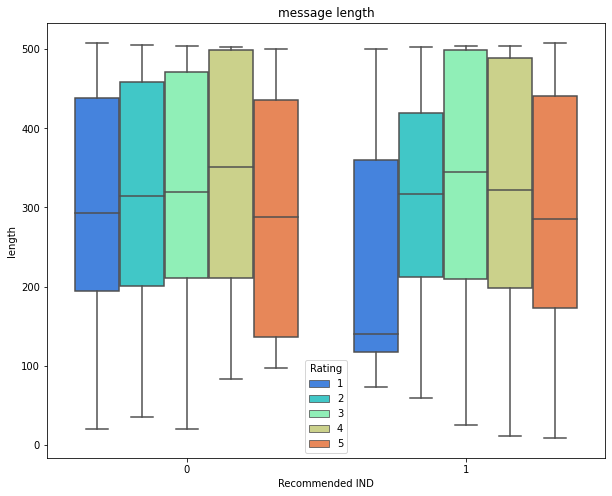

In [24]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Recommended IND',y='length',data=df,hue='Rating',palette='rainbow')
plt.title('message length')

In [25]:
df.length.describe()


count    22641.000000
mean       308.687911
std        143.940048
min          9.000000
25%        186.000000
50%        301.000000
75%        459.000000
max        508.000000
Name: length, dtype: float64

maximum length is 508.

**Maximum length review**

In [ ]:
df[df['length'] == 508]['Review Text'].iloc[0]


'I adore this blouse. the colors are vibrant (see my photo below). this is one of my favorite purchases from retailer. the top is light weight. true to size. i ordered a petite small and am 5 feet tall 120 lbs. and curvy. i left it untucked and loose like in the photo and it was very flattering. i disagree about it being frumpy. i wore it with kelly green retailer brand slacks paired with the retailer yellow sweater coat with white piping, and the retailer moss suede cross bag and neutral color (nude) fl'

**Removing puntuations**

In [26]:
import string
string.punctuation
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct
df['Review Text']=df['Review Text'].apply(lambda x: remove_punctuation(x))
df.head()

,Unnamed: 0,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,length
0,0,33,Absolutely wonderful silky and sexy and comfo...,4,1,0,Initmates,Intimate,Intimates,53
1,1,34,Love this dress its sooo pretty i happened t...,5,1,4,General,Dresses,Dresses,303
2,2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,500
3,3,50,I love love love this jumpsuit its fun flirty ...,5,1,0,General Petite,Bottoms,Pants,124
4,4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192


**Text blob for polarity**

Using polarity we can classifity the reviews with as Positive, Negative or Neutral. 

In [35]:
from textblob import TextBlob
df.head()

,Unnamed: 0,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,length,Polarity
0,0,33,Absolutely wonderful silky and sexy and comfo...,4,1,0,Initmates,Intimate,Intimates,53,0.633333
1,1,34,Love this dress its sooo pretty i happened t...,5,1,4,General,Dresses,Dresses,303,0.318750
2,2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,500,0.076392
3,3,50,I love love love this jumpsuit its fun flirty ...,5,1,0,General Petite,Bottoms,Pants,124,0.500000
4,4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192,0.393750


In [36]:
df["Polarity"] = df["Review Text"].apply(lambda x: TextBlob(x).sentiment.polarity)

In [37]:
df.head()

,Unnamed: 0,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,length,Polarity
0,0,33,Absolutely wonderful silky and sexy and comfo...,4,1,0,Initmates,Intimate,Intimates,53,0.633333
1,1,34,Love this dress its sooo pretty i happened t...,5,1,4,General,Dresses,Dresses,303,0.318750
2,2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,500,0.076392
3,3,50,I love love love this jumpsuit its fun flirty ...,5,1,0,General Petite,Bottoms,Pants,124,0.500000
4,4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192,0.393750


In [38]:
df['Polarity'].min()

-0.9750000000000001

In [39]:
df['Polarity'].mean()

0.24147953735572483

In [40]:
import plotly.express as px

In [41]:
px.histogram(df, x='Polarity', opacity = 0.5)

**Plot based on rating**

In [42]:
px.histogram(df, x='Polarity',color="Rating", opacity = 0.5)

In [43]:
def getAnalysis(polarity):
  if polarity < 0:
    return 'Negative'
  elif polarity == 0:
    return 'Neutral'
  else:
    return 'Positive'
   

In [44]:
 df['TextBlob_Analysis']=df['Polarity'].apply(getAnalysis)

In [45]:
df.head()

,Unnamed: 0,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,length,Polarity,TextBlob_Analysis
0,0,33,Absolutely wonderful silky and sexy and comfo...,4,1,0,Initmates,Intimate,Intimates,53,0.633333,Positive
1,1,34,Love this dress its sooo pretty i happened t...,5,1,4,General,Dresses,Dresses,303,0.318750,Positive
2,2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,500,0.076392,Positive
3,3,50,I love love love this jumpsuit its fun flirty ...,5,1,0,General Petite,Bottoms,Pants,124,0.500000,Positive
4,4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192,0.393750,Positive


In [46]:
polarity_plot=df['TextBlob_Analysis'].value_counts()

In [47]:
polarity_plot

Positive    21213
Negative     1333
Neutral        95
Name: TextBlob_Analysis, dtype: int64

**Plot for polarity based on Recommended IND**

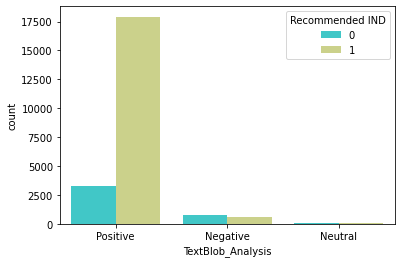

In [50]:
sns.countplot(data=df, x='TextBlob_Analysis', hue='Recommended IND', palette='rainbow')

The product recommeded are given a value '1' and they are in positive polarity.

**Pie Chart for polarity**

In [51]:
positive= 21213/len(df)*100
negative= 1333/len(df)*100
neutral= 95/len(df)*100

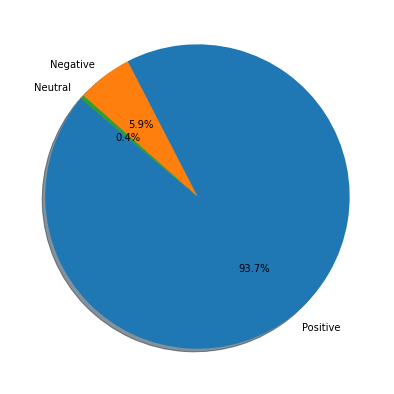

In [52]:
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive, negative, neutral]
plt.figure(figsize=(12,7))
plt.pie(sizes, labels=labels,autopct='%1.1f%%',shadow=True, startangle=140)
plt.show()

***Bar plot for polarity***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



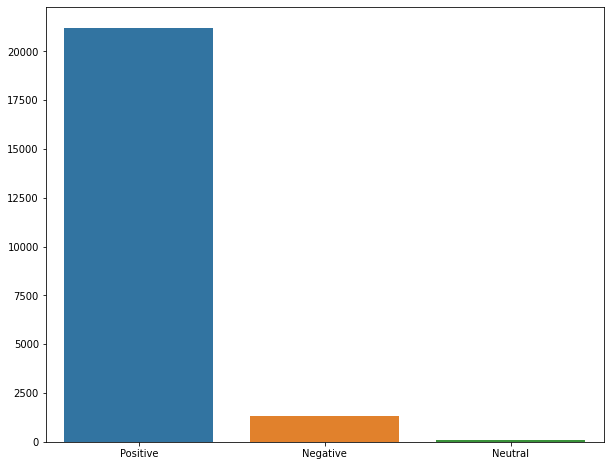

In [53]:
plt.figure(figsize=(10,8))
sns.barplot(polarity_plot.index, polarity_plot.values)

***Label Encoding***

In [54]:
 #Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['Encoded_value']= label_encoder.fit_transform(df['TextBlob_Analysis'])
  
df['Encoded_value'].unique()

array([2, 0, 1])

In [55]:
df.head(5)

,Unnamed: 0,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,length,Polarity,TextBlob_Analysis,Encoded_value
0,0,33,Absolutely wonderful silky and sexy and comfo...,4,1,0,Initmates,Intimate,Intimates,53,0.633333,Positive,2
1,1,34,Love this dress its sooo pretty i happened t...,5,1,4,General,Dresses,Dresses,303,0.318750,Positive,2
2,2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,500,0.076392,Positive,2
3,3,50,I love love love this jumpsuit its fun flirty ...,5,1,0,General Petite,Bottoms,Pants,124,0.500000,Positive,2
4,4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192,0.393750,Positive,2


In [56]:
df[df['TextBlob_Analysis']=='Negative']['Encoded_value'].head()

10    0
14    0
22    0
44    0
72    0
Name: Encoded_value, dtype: int64

Negative reviews are given 0 as encoded value, Positive as 2 and Neutral as 1

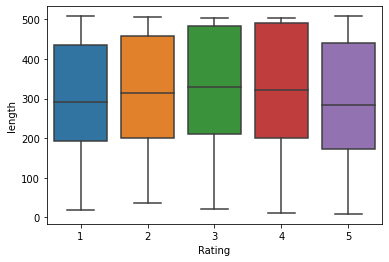

In [57]:
sns.boxplot(x="Rating", y="length", data=df,)

From the boxplot below,neutral Reviews(encoded value 0) length are smaller than the positive and negative reviews.

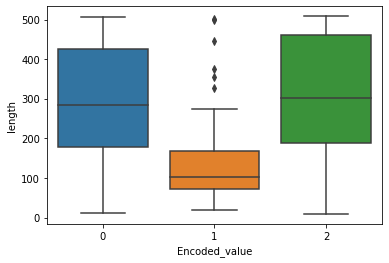

In [58]:
sns.boxplot(x="Encoded_value", y="length", data=df,)

In [59]:
df.groupby('Encoded_value').mean()

,Unnamed: 0,Age,Rating,Recommended IND,Positive Feedback Count,length,Polarity
Encoded_value,,,,,,,
0,11711.657914,43.362341,2.957989,0.431358,3.159790,297.592648,-0.092062
1,10902.863158,42.452632,3.400000,0.610526,2.010526,134.452632,0.000000
2,11746.436195,43.278933,4.264083,0.844152,2.600104,310.165417,0.263520


we can infer that, negative reviews( encoded value 0) are of a rating around 3, whereas the neutral reviews are with a rating around 3.5 and positive reviews are around 4.2

***heat map***

# ***Word Cloud***

we are splitting the dataframe based on the negative and positive reviews. To generate a word cloud of word which has a positive impact, we are creating a 'for loop' that iterates in the review column.

***Splitting into two data frames***

In [64]:
df_positive = df[df["TextBlob_Analysis"] == "Positive"]
df_negative = df[df["TextBlob_Analysis"] == "Negative"]

In [65]:
df_negative['Polarity']=df_negative['Polarity'].astype(float)
df_positive['Polarity']=df_positive['Polarity'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [66]:
df_positive.head()

,Unnamed: 0,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,length,Polarity,TextBlob_Analysis,Encoded_value
0,0,33,Absolutely wonderful silky and sexy and comfo...,4,1,0,Initmates,Intimate,Intimates,53,0.633333,Positive,2
1,1,34,Love this dress its sooo pretty i happened t...,5,1,4,General,Dresses,Dresses,303,0.318750,Positive,2
2,2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,500,0.076392,Positive,2
3,3,50,I love love love this jumpsuit its fun flirty ...,5,1,0,General Petite,Bottoms,Pants,124,0.500000,Positive,2
4,4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192,0.393750,Positive,2


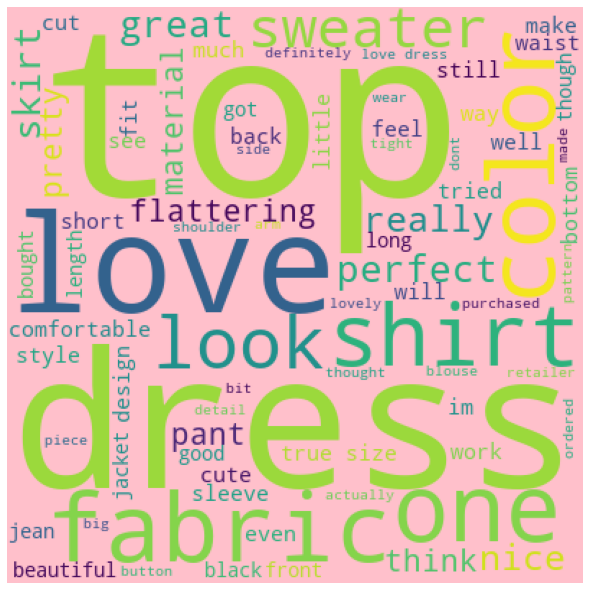

In [68]:
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in df_positive["Review Text"]:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 400, height = 400,
                background_color ='pink',max_words=100,
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [ ]:
#save image of word cloud
wordcloud.to_file("img/first_review.png")

***Finding top positive words and bigrams***

In [70]:
df['Polarity']=df['Polarity'].astype(float)

In [71]:
from nltk.util import ngrams
 
# Function to generate n-grams from sentences.
def extract_ngrams(data,num):
    n_grams = ngrams(nltk.messages_tfidf(df), num)
    return [ ' '.join(grams) for grams in n_grams]
 

In [ ]:
from nltk.util import ngrams
 
# Function to generate n-grams from sentences.
def extract_ngrams(df_positive,num):
    n_grams = ngrams(nltk.word_tokenize(df_positive), 1)
    return [ ' '.join(grams) for grams in n_grams]
 
data = 'A class is a blueprint for the object.'
 
print("1-gram: ", extract_ngrams(data, 1))
print("2-gram: ", extract_ngrams(data, 2))
print("3-gram: ", extract_ngrams(data, 3))
print("4-gram: ", extract_ngrams(data, 4))

# **Finding frequent positive and negative words**

In [98]:
import numpy as np
import nltk
from nltk import word_tokenize
from nltk import ngrams
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
nltk.download("stopwords")
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [86]:
df['Polarity'].dtypes

dtype('float64')

In [87]:
df_negative.head()

,Unnamed: 0,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,length,Polarity,TextBlob_Analysis,Encoded_value
10,10,53,Dress runs small esp where the zipper area run...,3,0,14,General,Dresses,Dresses,336,-0.069868,Negative,0
14,14,50,This is a nice choice for holiday gatherings i...,3,1,1,General,Dresses,Dresses,500,-0.057143,Negative,0
22,22,31,First of all this is not pullover styling ther...,2,0,7,General,Dresses,Dresses,437,-0.058095,Negative,0
44,44,48,Tried this on today at my local retailer and h...,5,1,9,General,Tops,Knits,391,-0.042587,Negative,0
72,72,27,I have a short torso and this works well for m...,5,1,4,General,Tops,Blouses,500,-0.079365,Negative,0


In [90]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [97]:
df['Review Text'] = df['Review Text'].astype(str)

In [ ]:
import numpy as np
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

In [100]:
def text_process(mess):
  nopunc = [char for char in mess if char not in string.punctuation]
  nopunc = ''.join(nopunc)
  words= [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
  return words

In [101]:
df_positive['Review Text'].apply(text_process)
df_positive['Review_text_cleaned']=df['Review Text'].apply(text_process)

In [102]:
df_positive.head()

,Unnamed: 0,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,length,Polarity,TextBlob_Analysis,Encoded_value,Review_text_cleaned
0,0,33,Absolutely wonderful silky and sexy and comfo...,4,1,0,Initmates,Intimate,Intimates,53,0.633333,Positive,2,"[Absolutely, wonderful, silky, sexy, comfortable]"
1,1,34,Love this dress its sooo pretty i happened t...,5,1,4,General,Dresses,Dresses,303,0.318750,Positive,2,"[Love, dress, sooo, pretty, happened, find, st..."
2,2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,500,0.076392,Positive,2,"[high, hopes, dress, really, wanted, work, ini..."
3,3,50,I love love love this jumpsuit its fun flirty ...,5,1,0,General Petite,Bottoms,Pants,124,0.500000,Positive,2,"[love, love, love, jumpsuit, fun, flirty, fabu..."
4,4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192,0.393750,Positive,2,"[shirt, flattering, due, adjustable, front, ti..."


In [103]:
df_positive['Review_text_cleaned']=df_positive['Review_text_cleaned'].astype(str)


In [104]:
import heapq
from operator import itemgetter
from collections import Counter

def Top50(data,title=None):
    token_data= []
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    for i in data:
        l = tokenizer.tokenize(i)
        token_data.append(l)
    corpus = []
    for i in token_data:
       for j in i:
         corpus.append(j)
    c = Counter(corpus)
    Di = dict(c)
    Top_50 = dict(heapq.nlargest(50, Di.items(), key=itemgetter(1)))
    dd = pd.DataFrame(Top_50.items(),columns=["word","frequency"])
    fig = plt.figure(1, figsize=(15, 15))
    plt.bar(range(len(Top_50)),Top_50.values(),align='center')        
    plt.xticks(range(len(Top_50)), list(Top_50.keys()))
    plt.tick_params(axis="x",rotation=90) 
    plt.tight_layout(pad = 0)
    if title==None:
        plt.title("Top 50 words")
    else:
        plt.title(title)
    return dd.head(10)

***Frequently used positive words***

,word,frequency
0,dress,9837
1,size,8146
2,love,7684
3,top,7167
4,fit,7012
5,like,6410
6,wear,6081
7,great,5705
8,im,5224
9,would,4707


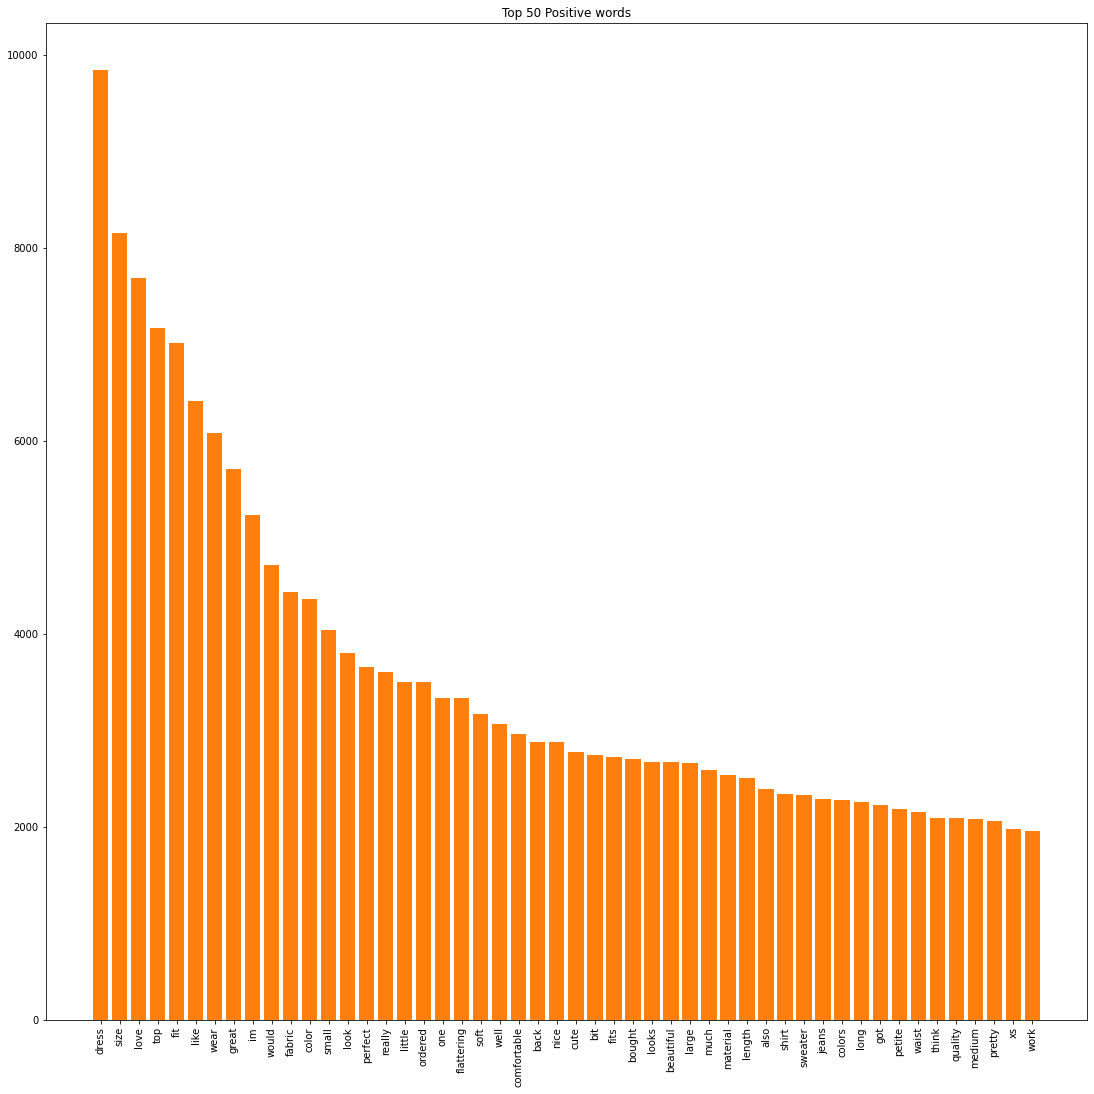

In [105]:
Top50(df_positive["Review_text_cleaned"],title="Top 50 Positive words")
top_positive_words=Top50(df_positive["Review_text_cleaned"],title="Top 50 Positive words")
top_positive_words

***Frequent negative words***

In [121]:
df_negative['Review Text'].apply(text_process)
df_negative['Review_text_cleaned']=df_negative['Review Text'].apply(text_process)

In [122]:
df_negative['Review_text_cleaned']=df_negative['Review_text_cleaned'].astype(str)

,word,frequency
0,dress,555
1,size,521
2,small,494
3,like,489
4,wear,321
5,fabric,299
6,would,289
7,im,281
8,back,277
9,little,271


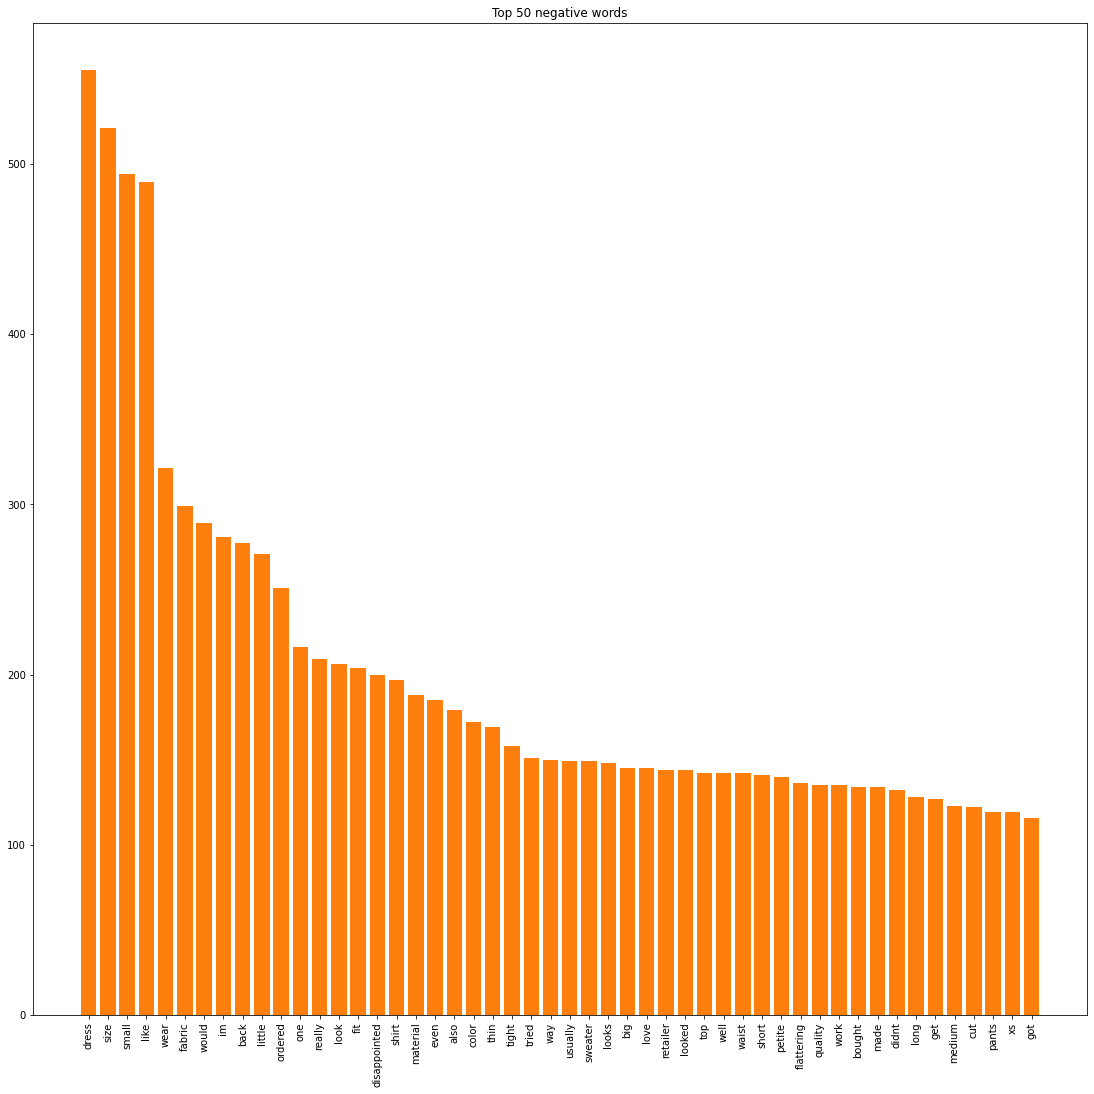

In [123]:
Top50(df_negative["Review_text_cleaned"],title="Top 50 Negative words")
top_negative_words=Top50(df_negative["Review_text_cleaned"],title="Top 50 negative words")
top_negative_words

In [99]:
def text_preprocessing(words):
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    nopunc = clean_text(text)
    tokenized_text = tokenizer.tokenize(nopunc)
    remove_stopwords = [w for w in tokenized_text if w not in stopwords.words('english')]
    combined_text = ' '.join(remove_stopwords)
    return combined_text

***Bi-grams***

In [107]:
df['Review Text'].apply(text_process)
df['Review_text_cleaned']=df['Review Text'].apply(text_process)

In [108]:
df.head()

,Unnamed: 0,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,length,Polarity,TextBlob_Analysis,Encoded_value,Review_text_cleaned
0,0,33,Absolutely wonderful silky and sexy and comfo...,4,1,0,Initmates,Intimate,Intimates,53,0.633333,Positive,2,"[Absolutely, wonderful, silky, sexy, comfortable]"
1,1,34,Love this dress its sooo pretty i happened t...,5,1,4,General,Dresses,Dresses,303,0.318750,Positive,2,"[Love, dress, sooo, pretty, happened, find, st..."
2,2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,500,0.076392,Positive,2,"[high, hopes, dress, really, wanted, work, ini..."
3,3,50,I love love love this jumpsuit its fun flirty ...,5,1,0,General Petite,Bottoms,Pants,124,0.500000,Positive,2,"[love, love, love, jumpsuit, fun, flirty, fabu..."
4,4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192,0.393750,Positive,2,"[shirt, flattering, due, adjustable, front, ti..."


In [111]:
df['Review_text_cleaned']=df['Review_text_cleaned'].astype(str)


In [116]:
def Ngram(data,num,title=None):
    token_data= []
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    for i in data:
        n_grams = ngrams(tokenizer.tokenize(i), num)
        p = [ ' '.join(grams) for grams in  n_grams]
        token_data.append(p)
    corpus = []
    for i in token_data:
       for j in i:
         corpus.append(j)
    c = Counter(corpus)
    Di = dict(c)
    Top_50 = dict(heapq.nlargest(50, Di.items(), key=itemgetter(1)))
    dd = pd.DataFrame(Top_50.items(),columns=["word","frequency"])
    fig = plt.figure(1, figsize=(15, 15))
    plt.bar(range(len(Top_50)),Top_50.values(),align='center')        
    plt.xticks(range(len(Top_50)), list(Top_50.keys()))
    plt.tick_params(axis="x",rotation=90) 
    plt.tight_layout(pad = 0)
    if title==None:       
        plt.title("Ngram")
    else:
        plt.title(title)
    return dd.head(10)

,word,frequency
0,true size,1283
1,usually wear,683
2,looks great,605
3,love dress,604
4,fit perfectly,598
5,well made,501
6,size small,478
7,usual size,475
8,fits perfectly,475
9,look like,408


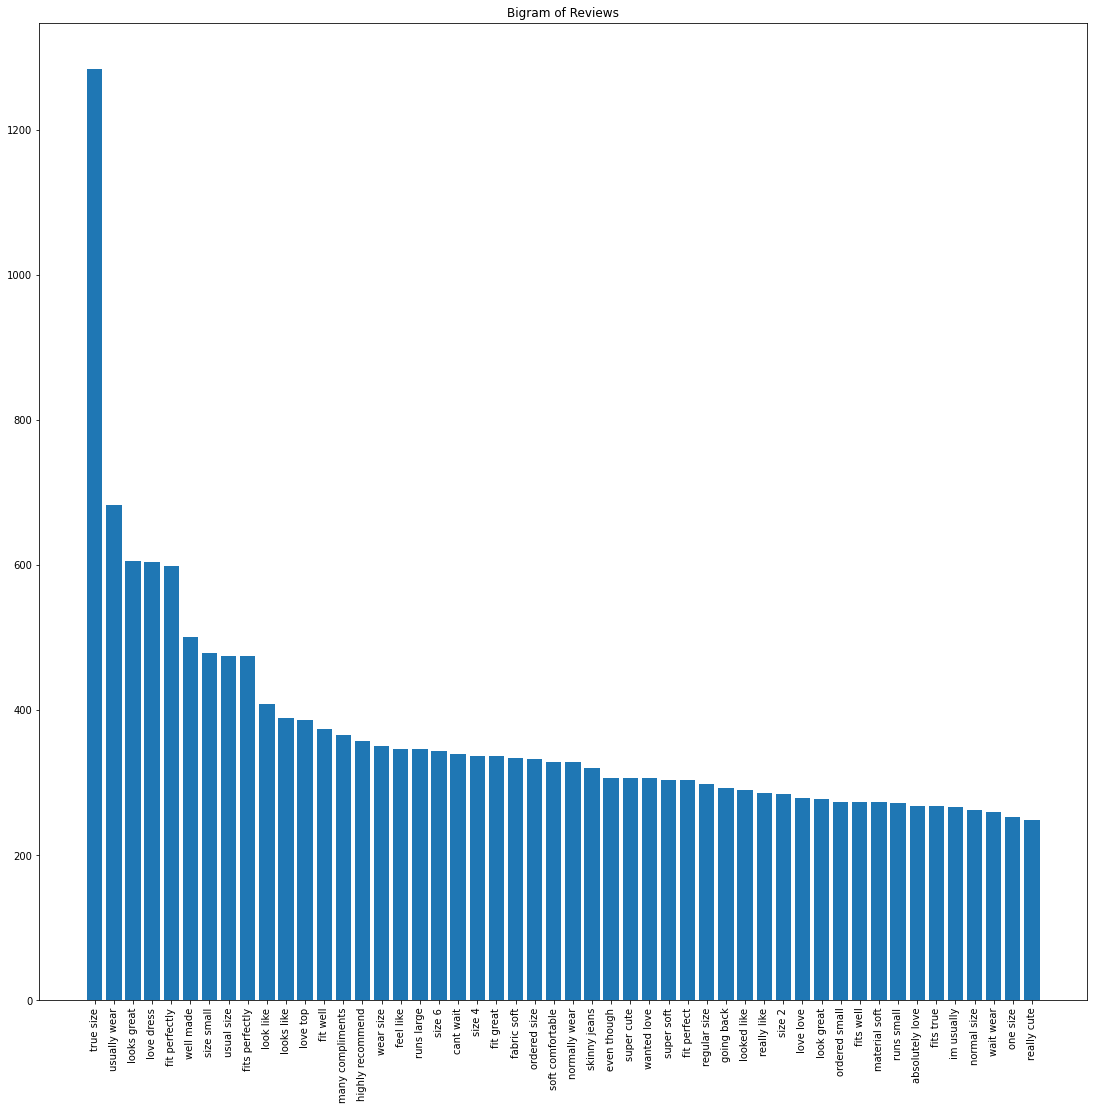

In [117]:
Ngram(df["Review_text_cleaned"],2,title="Bigram of Reviews")

***Bigram of positive review***

,word,frequency
0,true size,1257
1,usually wear,618
2,looks great,602
3,fit perfectly,596
4,love dress,591
5,well made,477
6,fits perfectly,471
7,usual size,443
8,size small,428
9,love top,384


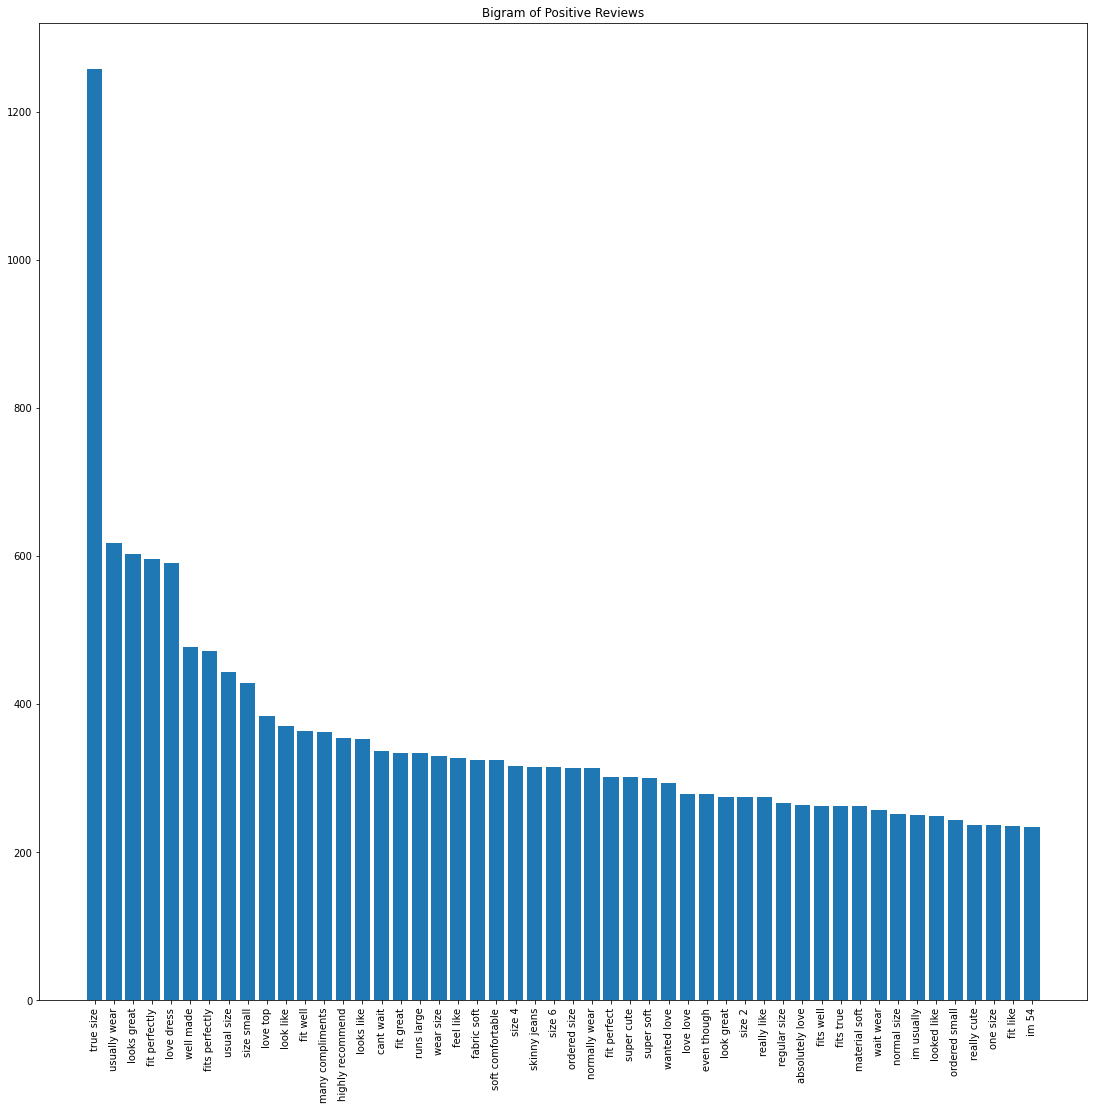

In [120]:
Ngram(df_positive["Review_text_cleaned"],2,title="Bigram of Positive Reviews")

***Bi-grams for Negative Reviewa***

,word,frequency
0,usually wear,64
1,going back,54
2,size small,47
3,runs small,40
4,looked like,40
5,looks like,35
6,look like,35
7,usual size,31
8,regular size,31
9,size 6,28


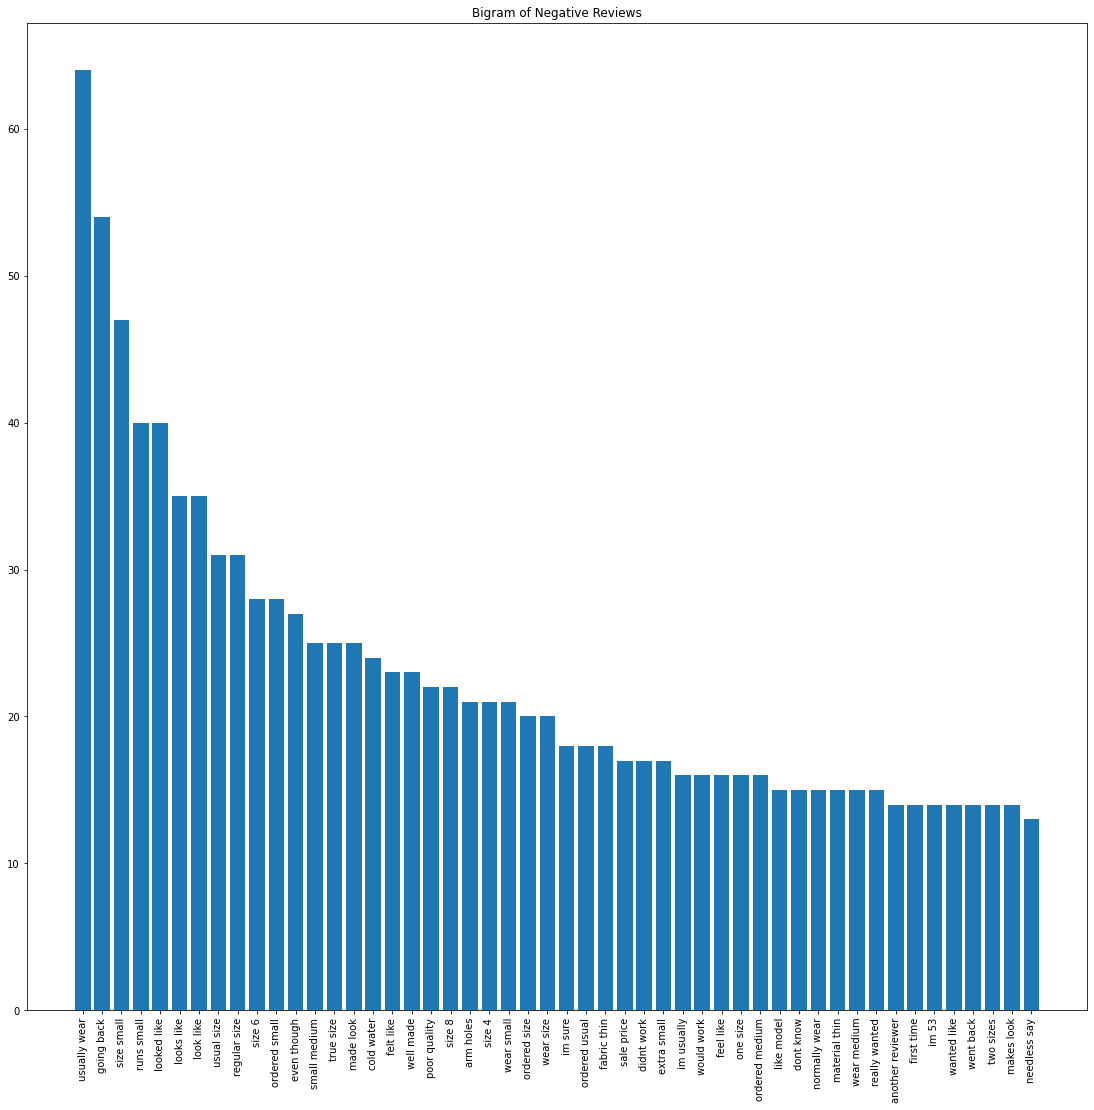

In [124]:
Ngram(df_negative["Review_text_cleaned"],2,title="Bigram of Negative Reviews")